In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input
import joblib

In [8]:
#needed varriables 
model = tf.keras.models.load_model('../models/mobilenetv2_model//')
folder_path = '../images/demo/'
category_names = {
    0: 'anger',
    1: 'contempt',
    2: 'sad',
    3: 'fear',
    4: 'disgust',
    5: 'happy',
    6: 'surprise'
}

In [9]:
# preprocess one picture - similar to what i used for the models 
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [14]:
# taking the images in the folder, making a prediction on them after being preprocessed 
def predict_on_folder(folder_path, model, class_names):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

    for image_path in image_paths:
        img_array = preprocess_image(image_path)

        # Prediction from the base model
        prediction = model.predict(img_array)[0]
        probabilities = tf.nn.softmax(prediction).numpy()

        # Sort class indices and probabilities in descending order
        sorted_indices = np.argsort(-probabilities)  
        sorted_probabilities = probabilities[sorted_indices]

        # showing the image
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis('off')

        # showing the predictions 
        print(f"Image: {os.path.basename(image_path)}")
        for idx in range(len(sorted_indices)):
            class_idx = sorted_indices[idx]
            class_name = class_names[class_idx]
            probability = sorted_probabilities[idx]
            print(f"{class_name}: {probability * 100:.2f}%")
        print(f"Predicted class: {class_names[sorted_indices[0]]}\n")
        plt.show()

1/1 [==============================] - 0s 263ms/step
Image: contemp.jpg
anger: 17.25%
surprise: 16.30%
disgust: 13.90%
fear: 13.60%
contempt: 13.49%
sad: 13.15%
happy: 12.30%
Predicted class: anger



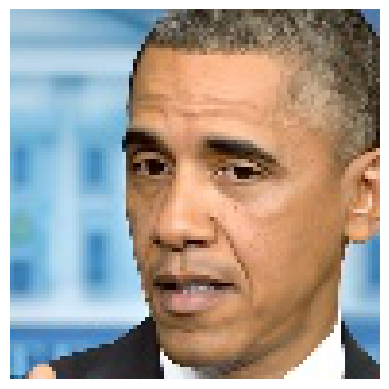

1/1 [==============================] - 0s 214ms/step
Image: Disgust.jpg
anger: 17.43%
surprise: 16.46%
disgust: 14.17%
fear: 13.38%
contempt: 13.19%
sad: 13.09%
happy: 12.29%
Predicted class: anger



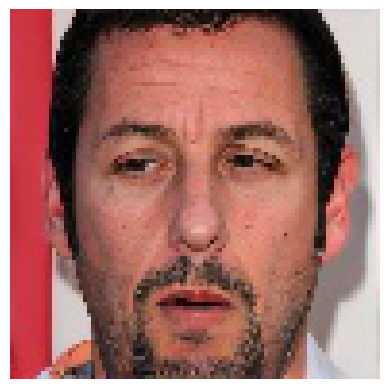

1/1 [==============================] - 0s 184ms/step
Image: fear.jpg
anger: 18.19%
surprise: 16.28%
disgust: 13.65%
fear: 13.37%
contempt: 13.30%
sad: 12.94%
happy: 12.27%
Predicted class: anger



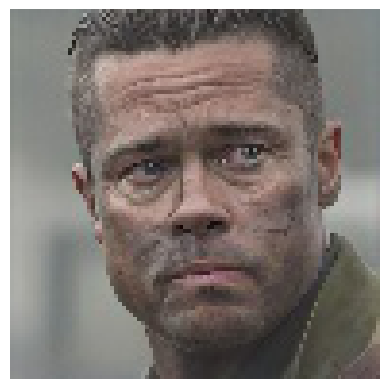

1/1 [==============================] - 0s 206ms/step
Image: ffhq_190.png
anger: 18.01%
surprise: 16.35%
fear: 13.65%
contempt: 13.57%
disgust: 13.27%
sad: 12.88%
happy: 12.28%
Predicted class: anger



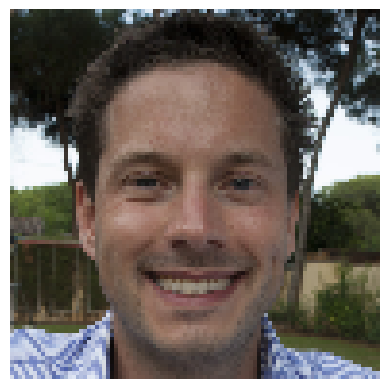

1/1 [==============================] - 0s 192ms/step
Image: ffhq_191.png
anger: 17.15%
surprise: 16.11%
disgust: 13.97%
fear: 13.62%
contempt: 13.57%
sad: 13.27%
happy: 12.31%
Predicted class: anger



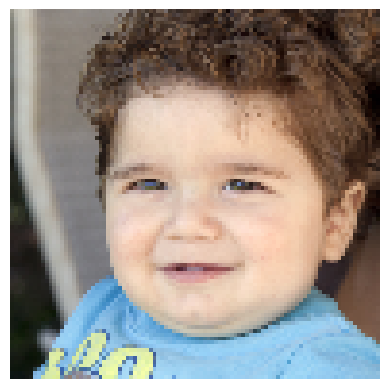

1/1 [==============================] - 0s 239ms/step
Image: ffhq_192.png
anger: 18.14%
surprise: 16.46%
fear: 13.55%
contempt: 13.48%
disgust: 13.26%
sad: 12.84%
happy: 12.27%
Predicted class: anger



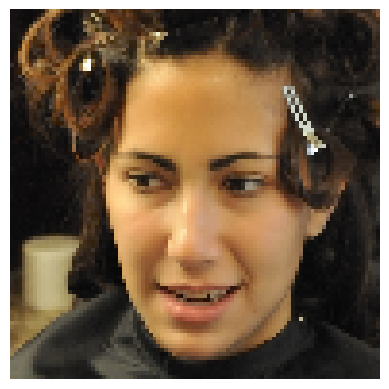

1/1 [==============================] - 0s 287ms/step
Image: ffhq_193.png
surprise: 15.56%
anger: 15.48%
disgust: 14.35%
fear: 14.31%
contempt: 13.99%
sad: 13.94%
happy: 12.37%
Predicted class: surprise



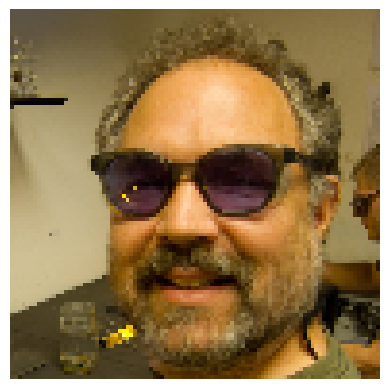

1/1 [==============================] - 0s 204ms/step
Image: ffhq_194.png
anger: 18.10%
surprise: 16.37%
fear: 13.59%
contempt: 13.53%
disgust: 13.28%
sad: 12.87%
happy: 12.28%
Predicted class: anger



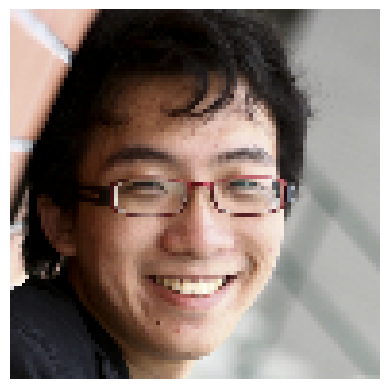

1/1 [==============================] - 0s 174ms/step
Image: ffhq_195.png
anger: 17.85%
surprise: 16.50%
disgust: 14.00%
fear: 13.31%
contempt: 13.12%
sad: 12.94%
happy: 12.28%
Predicted class: anger



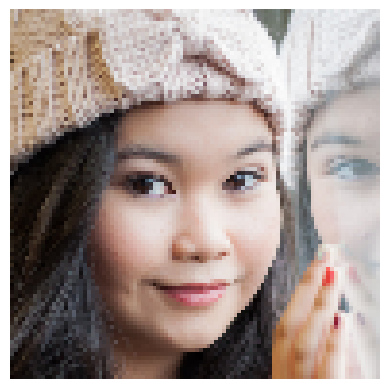

1/1 [==============================] - 0s 324ms/step
Image: Happy.jpg
anger: 18.11%
surprise: 16.29%
fear: 13.55%
contempt: 13.52%
disgust: 13.35%
sad: 12.90%
happy: 12.28%
Predicted class: anger



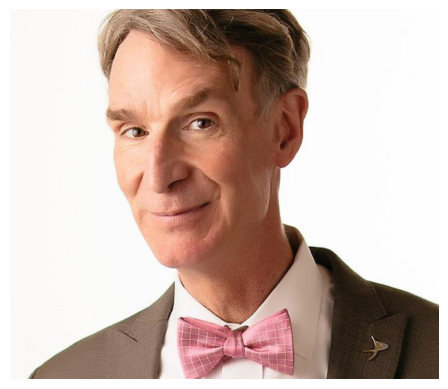

1/1 [==============================] - 0s 143ms/step
Image: mad.jpg
surprise: 16.13%
anger: 15.51%
fear: 14.79%
contempt: 14.11%
disgust: 13.68%
sad: 13.44%
happy: 12.34%
Predicted class: surprise



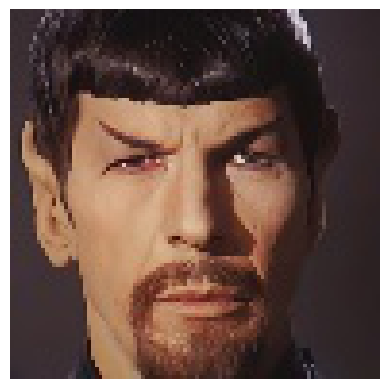

1/1 [==============================] - 0s 230ms/step
Image: raf1.jpg
anger: 17.95%
surprise: 16.37%
fear: 13.59%
contempt: 13.52%
disgust: 13.38%
sad: 12.92%
happy: 12.28%
Predicted class: anger



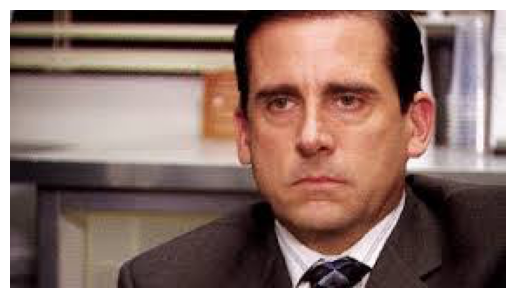

1/1 [==============================] - 0s 276ms/step
Image: raf2.jpg
anger: 17.25%
surprise: 16.47%
disgust: 14.34%
fear: 13.38%
contempt: 13.16%
sad: 13.10%
happy: 12.30%
Predicted class: anger



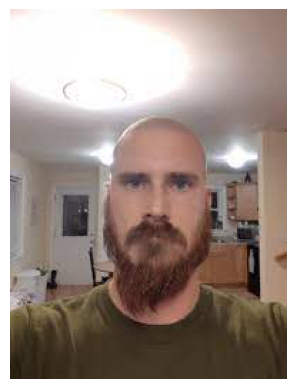

1/1 [==============================] - 0s 244ms/step
Image: raf3.jpg
anger: 18.03%
surprise: 16.39%
fear: 13.59%
contempt: 13.54%
disgust: 13.29%
sad: 12.88%
happy: 12.28%
Predicted class: anger



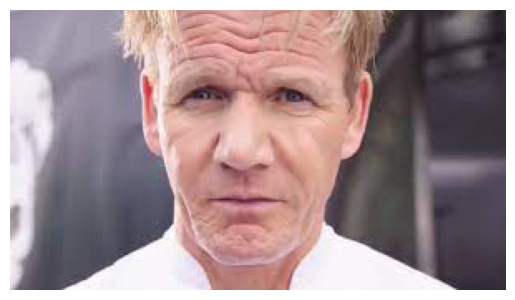

1/1 [==============================] - 0s 167ms/step
Image: raf4.jpg
anger: 18.22%
surprise: 16.37%
disgust: 13.48%
fear: 13.44%
contempt: 13.34%
sad: 12.87%
happy: 12.27%
Predicted class: anger



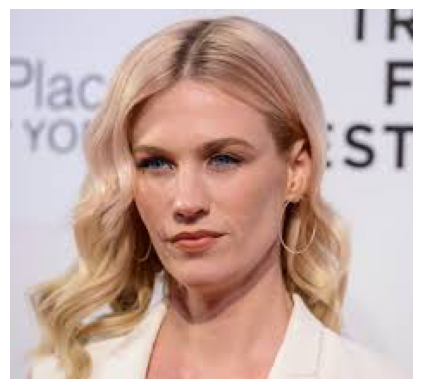

1/1 [==============================] - 0s 203ms/step
Image: raf5.jpg
anger: 17.41%
surprise: 16.46%
disgust: 14.18%
fear: 13.40%
contempt: 13.19%
sad: 13.06%
happy: 12.29%
Predicted class: anger



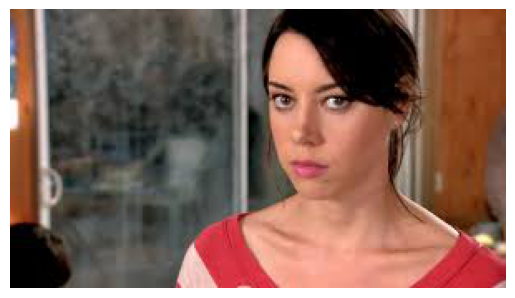

1/1 [==============================] - 0s 161ms/step
Image: raf6.jpg
anger: 17.86%
surprise: 16.47%
disgust: 13.92%
fear: 13.29%
contempt: 13.20%
sad: 12.98%
happy: 12.28%
Predicted class: anger



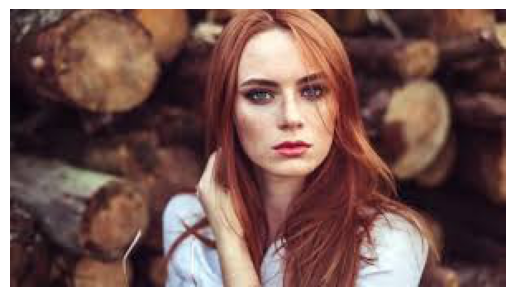

1/1 [==============================] - 0s 167ms/step
Image: raf7.jpg
anger: 18.22%
surprise: 16.22%
disgust: 13.56%
fear: 13.40%
contempt: 13.39%
sad: 12.94%
happy: 12.28%
Predicted class: anger



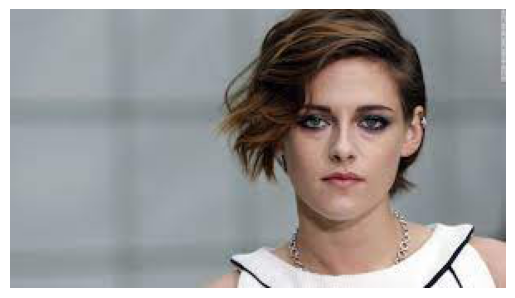

1/1 [==============================] - 0s 176ms/step
Image: raf8.jpg
anger: 16.64%
surprise: 16.45%
fear: 14.11%
contempt: 13.85%
disgust: 13.51%
sad: 13.13%
happy: 12.32%
Predicted class: anger



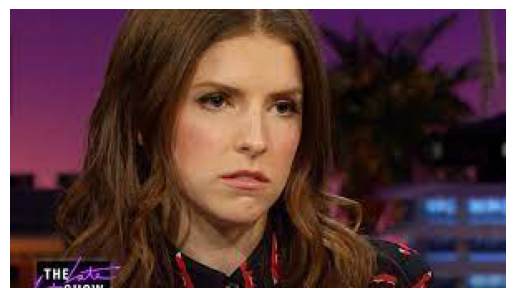

1/1 [==============================] - 0s 242ms/step
Image: raf9.jpg
anger: 18.23%
surprise: 16.24%
disgust: 13.58%
fear: 13.39%
contempt: 13.35%
sad: 12.93%
happy: 12.27%
Predicted class: anger



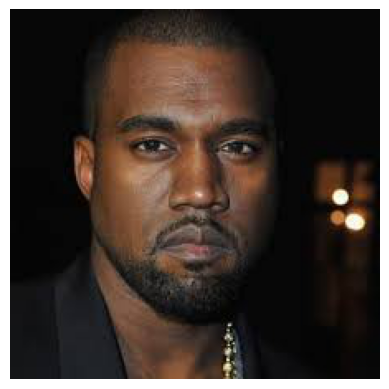

1/1 [==============================] - 0s 214ms/step
Image: sad.jpg
anger: 17.16%
surprise: 16.35%
disgust: 14.06%
fear: 13.58%
contempt: 13.37%
sad: 13.17%
happy: 12.31%
Predicted class: anger



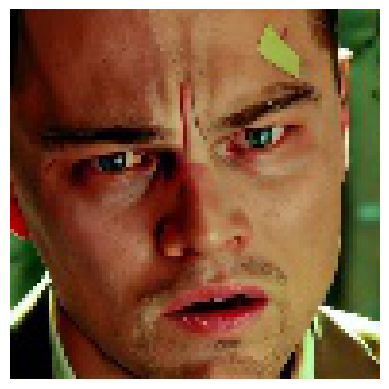

1/1 [==============================] - 0s 182ms/step
Image: surprise.jpg
anger: 17.61%
surprise: 16.51%
disgust: 14.09%
fear: 13.37%
contempt: 13.14%
sad: 12.99%
happy: 12.29%
Predicted class: anger



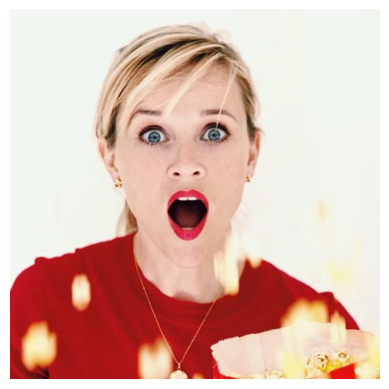

1/1 [==============================] - 0s 242ms/step
Image: unnamed (1).png
surprise: 16.04%
anger: 15.80%
fear: 14.43%
contempt: 14.12%
disgust: 13.78%
sad: 13.49%
happy: 12.34%
Predicted class: surprise



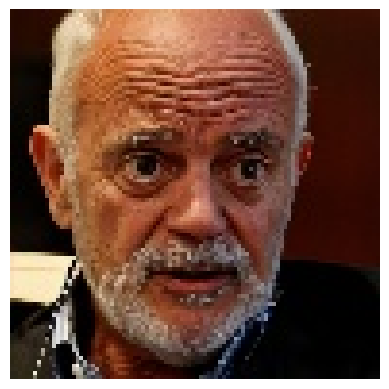

1/1 [==============================] - 0s 201ms/step
Image: unnamed.png
anger: 17.82%
surprise: 16.51%
disgust: 14.02%
fear: 13.31%
contempt: 13.11%
sad: 12.94%
happy: 12.28%
Predicted class: anger



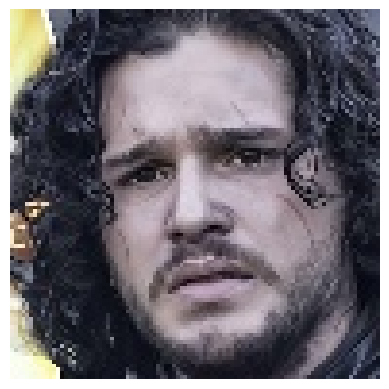

In [15]:
predict_on_folder(folder_path, model, category_names)
